# Group Project
## Sports Analytics
---


**Load List of Active GMs**

In [1]:
import pandas as pd
gm = pd.read_csv('~/Documents/Fordham/Sports Analytics/nbaGMscorer/activeGMsV2.txt',sep='\t')

In [2]:
gm.head()

,Team,General Manager,Date of hire,Active,URL
0,Atlanta Hawks,Travis Schlenk,2017,Y,http://www.prosportstransactions.com/basketbal...
1,Boston Celtics,Danny Ainge,2003,Y,http://www.prosportstransactions.com/basketbal...
2,Brooklyn Nets,Sean Marks,2016,Y,http://www.prosportstransactions.com/basketbal...
3,Charlotte Hornets,Rich Cho,2011,Y,http://www.prosportstransactions.com/basketbal...
4,Chicago Bulls,Gar Forman,2009,Y,http://www.prosportstransactions.com/basketbal...


Text(0.5,1,'Count of GMs by Hired Date')

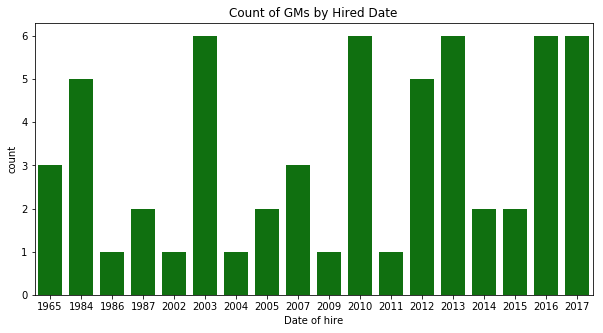

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
gmCnt = sns.countplot(x="Date of hire", data=gm,color='green')
gmCnt.set_title("Count of GMs by Hired Date")

Text(0.5,1,'Count of Active GMs by Hired Date')

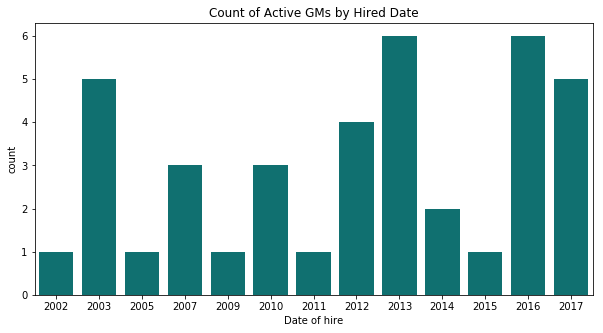

In [5]:
gmNew = gm[(gm["Active"]=="Y")]
plt.figure(figsize=(10,5))
gmCnt = sns.countplot(x="Date of hire", data=gmNew,color='teal')
gmCnt.set_title("Count of Active GMs by Hired Date")

---
## Scrape Transactions

Transactions for each active GM were scraped in order to determine the transactions for which the GM / executive was responsible for.
* *Note*: the role of the general manager can be very different for each franchise and sometimes the personnel decisions are not solely made by the GM
* Data was sourced from http://www.prosportstransactions.com
* Only contains GMs active as of *March 4th 2018*

In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import urllib.request
import re
import requests
import pprint
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

In [444]:
def gmScrape(gmName,URL):
        query = (URL)
        opener = AppURLopener()
        response = opener.open(query)
        soup = BeautifulSoup(response,'html.parser')
        urlList = []
        for tr in soup.find_all('tr')[-1:]:
            tds = tr.find_all('a')
            for x in tds[:-1]:
                urlList.append(str(URL[:-1])+str(int(x.text)*25)+"&start="+str((int(x.text)*25)-25))
        info = soup.find('table',{'class':'datatable center'})
        date = []
        team = []
        acquired = []
        relinquished = []
        notes = []
        for tr in soup.find_all('tr')[2:-1]:
            tds = tr.find_all('td')
            date.append(tds[0].text)
            team.append(tds[1].text)
            acquired.append(tds[2].text)
            relinquished.append(tds[3].text)
            notes.append(tds[4].text)
        for y in urlList:
            query = (str(y))
            opener = AppURLopener()
            response = opener.open(query)
            soup = BeautifulSoup(response,'html.parser')
            for tr in soup.find_all('tr')[1:-1]:
                tds = tr.find_all('td')
                date.append(tds[0].text)
                team.append(tds[1].text)
                acquired.append(tds[2].text)
                relinquished.append(tds[3].text)
                notes.append(tds[4].text)
        df1 = pd.DataFrame({'date':date,
                     'team': team,
                     'acquired':acquired,
                     'relinquished':relinquished,
                     'notes':notes})
        df1['GM'] = gmName
        return(df1)

In [445]:
finalDat = pd.DataFrame()
for genM,urlEach in zip(gm['General Manager'],gm['URL']):
    if str(urlEach).lower()=="nan":
        pass
    else:
        dat = gmScrape(str(genM),str(urlEach))
        finalDat = pd.concat([finalDat,dat])
        finalDat.reset_index()

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods


In [446]:
finalDat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13423 entries, 0 to 69
Data columns (total 6 columns):
acquired        13423 non-null object
date            13423 non-null object
notes           13423 non-null object
relinquished    13423 non-null object
team            13423 non-null object
GM              13423 non-null object
dtypes: object(6)
memory usage: 734.1+ KB


In [447]:
len(finalDat)

13423

In [448]:
finalDat.query('GM=="Pat Riley"')

,acquired,date,notes,relinquished,team,GM
0,• Randy Pfund,1995-09-19,hired as executive VP of player personnel,,Heat,Pat Riley
1,• Bob McAdoo,1995-09-20,hired as assistant coach,,Heat,Pat Riley
2,• Jeff Bzdelik,1995-09-20,hired as assistant coach / scout,,Heat,Pat Riley
3,• Scotty Robertson,1995-09-20,hired as assistant coach,,Heat,Pat Riley
4,• Stan Van Gundy,1995-09-20,hired as assistant coach,,Heat,Pat Riley
5,• Tony Fiorentino,1995-09-20,hired as assistant coach / scout,,Heat,Pat Riley
6,• Keith Askins,1995-09-21,re-signed free agent to a multi-year contract,,Heat,Pat Riley
7,• Stacey King,1995-10-04,signed unrestricted free agent,,Heat,Pat Riley
8,• Alan Ogg,1995-10-05,signed free agent,,Heat,Pat Riley
9,• Bruce Bowen,1995-10-05,signed free agent,,Heat,Pat Riley


---
# Clean Columns for Analysis

* Remove special characters from acquired column
* normalize the transactions

Text(0.5,1,'Count of Transaction by GM')

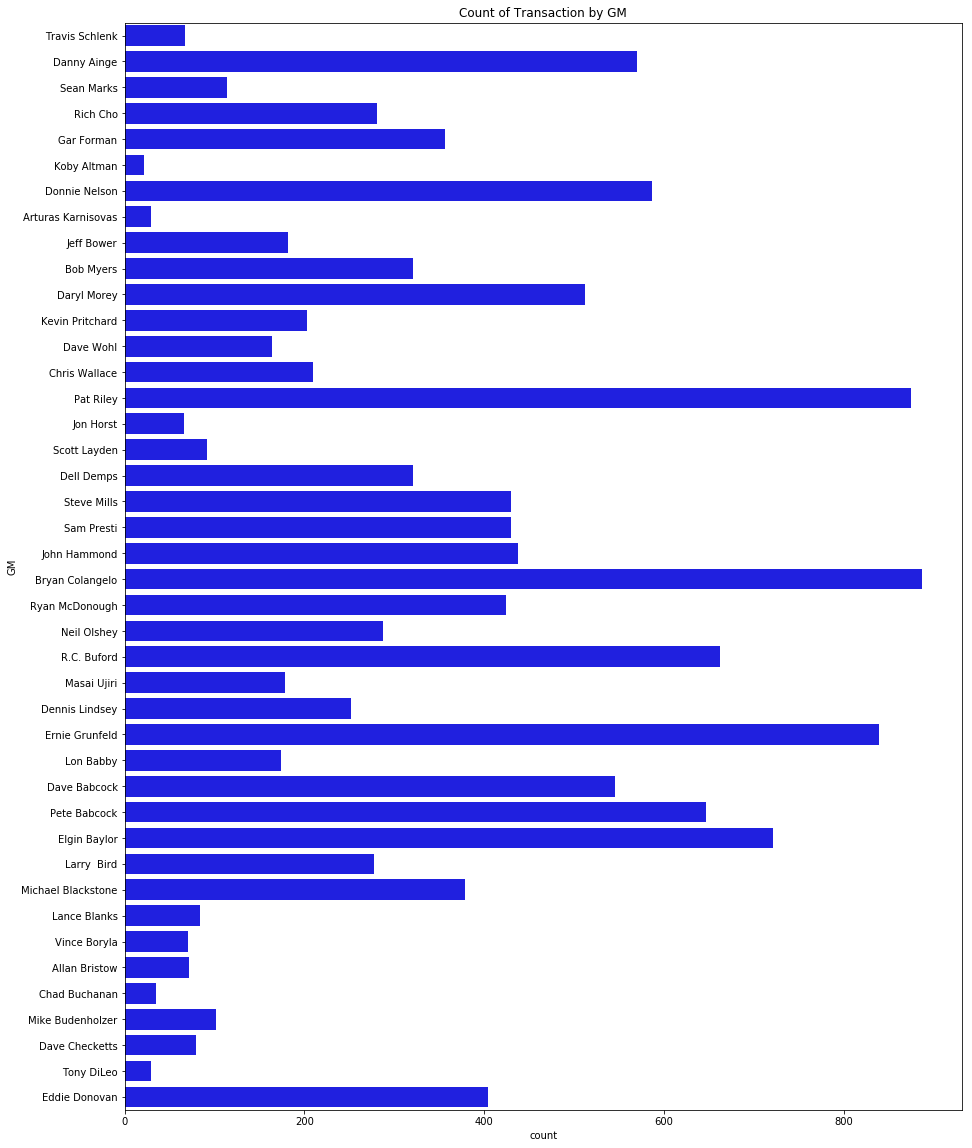

In [449]:
plt.figure(figsize=(15,20))
finalDat.groupby(finalDat['GM']).count()
gmCnt2 = sns.countplot(y='GM', data=finalDat,color='blue')
gmCnt2.set_title("Count of Transaction by GM")

#### Top 5 active GMs

Text(0.5,1,'Count of Transaction by Executive')

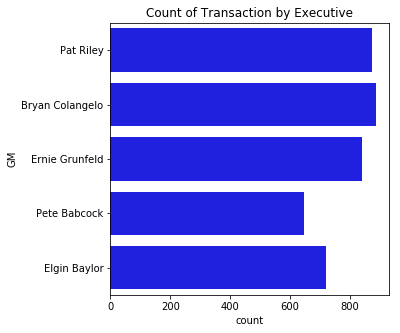

In [450]:
plt.figure(figsize=(5,5))
# newFin = finalDat.groupby(finalDat['GM']).count().sort_values("team",ascending=False).reset_index().head()

topGmsTransactions = ("Bryan Colangelo","Pat Riley","Ernie Grunfeld","Elgin Baylor", "Pete Babcock")
newFin = finalDat[(finalDat["GM"].isin(topGmsTransactions))]
# newFin.info()
# newFin.sort_values("count",ascending=False)
# newFin.sort_values("team",ascending=False)
gmCnt2 = sns.countplot(y='GM', data=newFin,color='blue')
gmCnt2.set_title("Count of Transaction by Executive")

#### Clean Players Columns

In [451]:
finalDat.head()

,acquired,date,notes,relinquished,team,GM
0,• Marco Belinelli• Miles Plumlee• 2017 second...,2017-06-20,trade with Hornets,• Dwight Howard• 2017 second round pick (#31-...,Hawks,Travis Schlenk
1,• Alpha Kaba,2017-06-22,2017 NBA draft second round pick (#60 overall),,Hawks,Travis Schlenk
2,• John Collins (b),2017-06-22,2017 NBA draft first round pick (#19 overall),,Hawks,Travis Schlenk
3,• Tyler Dorsey,2017-06-22,2017 NBA draft second round pick (#41 overall),,Hawks,Travis Schlenk
4,• Tim Hardaway Jr.,2017-06-26,"team tendered $4.6M qualifying offer, making ...",,Hawks,Travis Schlenk


In [452]:
newDat = finalDat
newDat['acquired'] = newDat['acquired'].astype('str').str.replace('•','|').str.strip().map(lambda x: x.split('|')[1:])
newDat['relinquished'] = newDat['relinquished'].astype('str').str.replace('•','|').str.strip().map(lambda x: x.split('|')[1:])
newDat.head()

,acquired,date,notes,relinquished,team,GM
0,"[ Marco Belinelli, Miles Plumlee, 2017 secon...",2017-06-20,trade with Hornets,"[ Dwight Howard, 2017 second round pick (#31-...",Hawks,Travis Schlenk
1,[ Alpha Kaba],2017-06-22,2017 NBA draft second round pick (#60 overall),[],Hawks,Travis Schlenk
2,[ John Collins (b)],2017-06-22,2017 NBA draft first round pick (#19 overall),[],Hawks,Travis Schlenk
3,[ Tyler Dorsey],2017-06-22,2017 NBA draft second round pick (#41 overall),[],Hawks,Travis Schlenk
4,[ Tim Hardaway Jr.],2017-06-26,"team tendered $4.6M qualifying offer, making ...",[],Hawks,Travis Schlenk


#### Classify transaction types and build flags

In [453]:
newDat['drafted'] = newDat['notes'].map(lambda x: x.lower()).str.contains('pick')
newDat['traded'] = newDat['notes'].map(lambda x: x.lower()).str.contains('trade')
newDat['signed'] = (newDat['acquired'].map(lambda x: len(x)) >= 1) & (newDat['relinquished'].map(lambda x: len(x)) == 0) & (newDat['notes'].map(lambda x: x.lower()).str.contains('pick')==False)
newDat['released'] = (newDat['acquired'].map(lambda x: len(x)) == 0) & (newDat['relinquished'].map(lambda x: len(x)) >= 1)
newDat['DraftPickNo'] = newDat['notes'].map(lambda x: x.lower()).str.extract('#(.\d)',expand=False)                                                                    

In [454]:
newDatClassified = newDat[(newDat['signed']==True) | (newDat['traded']==True) | (newDat['released']==True) | (newDat['drafted']==True)] 

In [455]:
len(newDatClassified)

13318

In [456]:
newDatClassified.head(3).T

,0,1,2
acquired,"[ Marco Belinelli, Miles Plumlee, 2017 secon...",[ Alpha Kaba],[ John Collins (b)]
date,2017-06-20,2017-06-22,2017-06-22
notes,trade with Hornets,2017 NBA draft second round pick (#60 overall),2017 NBA draft first round pick (#19 overall)
relinquished,"[ Dwight Howard, 2017 second round pick (#31-...",[],[]
team,Hawks,Hawks,Hawks
GM,Travis Schlenk,Travis Schlenk,Travis Schlenk
drafted,False,True,True
traded,True,False,False
signed,False,False,False
released,False,False,False


In [457]:
finalDat.query('GM =="Pat Riley"')['date'].value_counts()

1999-01-21    10
1996-07-14    10
1995-10-05     9
2013-09-28     9
2014-07-01     9
2016-07-01     8
2014-09-17     8
2004-07-01     7
2010-07-01     7
2003-06-30     7
2017-07-01     6
2011-12-10     6
2016-07-10     6
2010-06-24     6
1995-09-20     5
2011-12-09     5
2016-10-22     5
2015-10-24     5
2017-07-07     5
2001-10-01     5
2004-06-24     4
2009-09-29     4
2009-06-25     4
2012-07-01     4
1996-10-03     4
2008-09-26     4
1996-02-22     4
1995-10-12     4
2007-06-28     4
2011-07-01     4
              ..
2014-10-25     1
2007-07-20     1
1998-01-21     1
2003-11-03     1
2001-06-27     1
2011-12-16     1
2013-09-23     1
2009-02-13     1
2014-02-20     1
2010-07-20     1
1997-01-18     1
1999-01-28     1
2013-03-02     1
2017-02-19     1
2009-01-22     1
1997-03-06     1
1997-09-17     1
2010-07-10     1
2016-02-16     1
2003-07-30     1
2015-06-27     1
1997-01-25     1
2005-08-03     1
2007-06-29     1
2016-04-12     1
2004-06-22     1
2004-08-04     1
2004-08-11    

#### Develop summary statistics for transaction volume based on transaction type

In [458]:
# expand df.listcol into its own dataframe
# tags = newDatClassified['acquired'].apply(pd.Series)
final = newDatClassified.join(newDatClassified.acquired.apply(pd.Series)
                          .stack()
                          .reset_index(level=1, drop=True)
                          .to_frame('acquired'),rsuffix='keep_')

In [459]:
final.query('GM=="Pat Riley"')['date'].value_counts()

1995-10-05    379
1996-07-14    350
1999-01-21    249
1995-09-20    238
1996-02-22    147
1995-10-12    127
1996-10-03    111
2001-10-01    101
1999-09-29     97
1996-02-12     93
1995-10-25     81
2003-06-30     75
1996-07-18     74
1999-10-18     71
1997-03-15     67
2004-07-01     67
1997-01-06     65
1997-01-12     61
1997-05-27     59
1998-01-27     58
1999-09-01     57
1997-06-25     56
1997-07-07     55
1997-10-26     53
1996-06-26     53
1997-09-09     52
1999-02-14     48
1999-06-30     47
1999-01-30     47
2000-06-28     46
             ... 
2013-07-10      1
2016-02-16      1
2015-06-27      1
2015-03-18      1
2014-06-17      1
2016-02-29      1
2015-08-18      1
2015-03-02      1
2016-04-12      1
2016-06-21      1
2015-02-26      1
2017-08-20      1
2016-08-17      1
2015-08-21      1
2014-08-01      1
2014-06-24      1
2015-02-08      1
2016-07-15      1
2014-10-15      1
2017-06-22      1
2014-08-06      1
2011-12-22      1
2017-07-04      1
2015-03-12      1
2015-01-22

In [460]:
final['transaction count'] =1       #initially, set that counter to 1.
group_data = final.groupby(['GM','drafted','traded','signed','released'])['transaction count'].sum() 
group_data.head()

GM                  drafted  traded  signed  released
Allan Bristow       False    False   False   True         933
                                     True    False       1199
                             True    False   False        267
                    True     False   False   False        326
Arturas Karnisovas  False    False   False   True         186
Name: transaction count, dtype: int64

In [461]:
import numpy as np
finalTmp = final.groupby(['GM','drafted','traded','signed','released'], as_index=False).sum()
# finalTmp.head()
# Drafted
finalTmp['drafted'] = np.where(finalTmp['drafted'] == True, finalTmp['transaction count'], finalTmp['drafted'])
finalTmp['drafted'] = np.where(finalTmp['drafted'] == False, 0, finalTmp['drafted'])

# Traded
finalTmp['signed'] = np.where(finalTmp['signed'] == True, finalTmp['transaction count'], finalTmp['signed'])
finalTmp['signed'] = np.where(finalTmp['signed'] == False, 0, finalTmp['signed'])

# Signed
finalTmp['traded'] = np.where(finalTmp['traded'] == True, finalTmp['transaction count'], finalTmp['traded'])
finalTmp['traded'] = np.where(finalTmp['traded'] == False, 0, finalTmp['traded'])

# Released
finalTmp['released'] = np.where(finalTmp['released'] == True, finalTmp['transaction count'], finalTmp['released'])
finalTmp['released'] = np.where(finalTmp['released'] == False, 0, finalTmp['released'])
# finalTmp.head()


finalTmp2 = pd.melt(finalTmp, id_vars=['GM'], value_vars=['drafted','traded','signed','released'],var_name='type', value_name='cnt')
finalTmp2.drop_duplicates(inplace=True)
# finalTmp2.head()

finalTmp3 = finalTmp2[(finalTmp2['cnt']>0)]
finalTmp3.head()

,GM,type,cnt
3,Allan Bristow,drafted,326
7,Arturas Karnisovas,drafted,227
11,Bob Myers,drafted,596
15,Bryan Colangelo,drafted,2083
19,Chad Buchanan,drafted,126


Text(0.5,1,'Transaction Volume by Type')

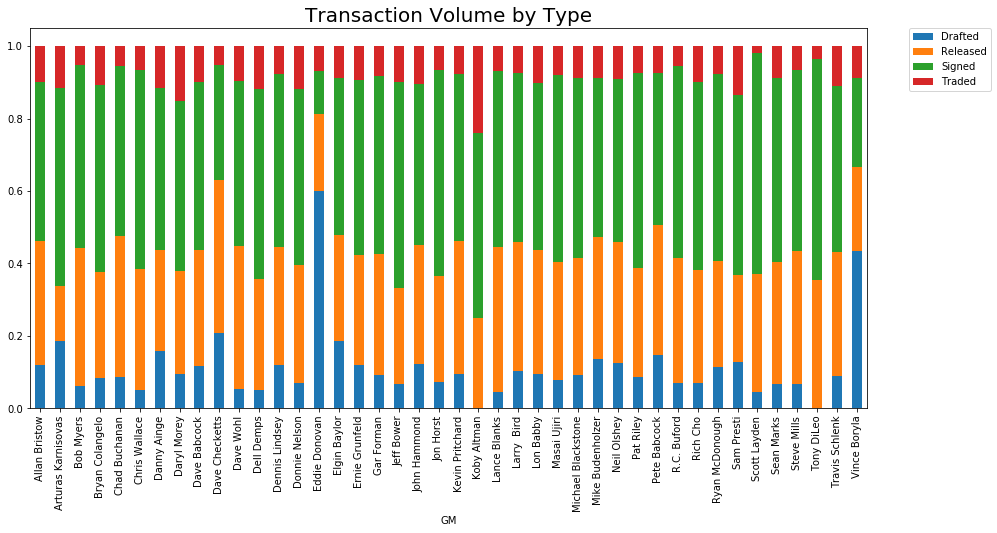

In [462]:
from matplotlib.pyplot import *
tps = finalTmp3.pivot_table(values=['cnt'], 
                      index='GM',
                      columns='type',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True,figsize=(15,7))
legend(labels = ('Drafted','Released','Signed','Traded'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Transaction Volume by Type",fontsize = 20)

---
## Player Statistics
* **Source**: https://www.kaggle.com/drgilermo/nba-players-stats/data
* Each row is a player and year

In [24]:
baseStats = pd.read_csv('~/Documents/Fordham/Sports Analytics/nbaGMscorer/season_stats.csv',sep=',')

In [25]:
baseStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

#### Win Shares
* Descriptive statistics
* Histrogram (all seasons after 2010)

> **What is win share?** <br>
Win share is composed of 2 aggregate measures for both offense and defense.
<br>
<br>
*Offensive win shares* are derived from 4 components:
1. Calculate points produced per player
2. Calculate offensive posessions
3. Calculate marginal offense for each player
4. Calculate marginal points per win
5. Credit offensive win shares to the players
<br>
<br>
*Defensive win shares* are derived from 4 components:
1. Calculate defensive rating (estimate of the player's points allowed per 100 defensive posessions
2. Calculate marginal defense for each player (incorporates team defensive measures)
3. Calculate marginal points per win
4. Credit defensive win shares to players
> *Source:* https://www.basketball-reference.com/about/ws.html


In [26]:
baseStats['WS'].describe(include = 'all')

count    24585.000000
mean         2.485796
std          3.058638
min         -2.800000
25%          0.200000
50%          1.400000
75%          3.800000
max         25.400000
Name: WS, dtype: float64

Text(0.5,1,'Histrogram of Win Share (2010 - Current)')

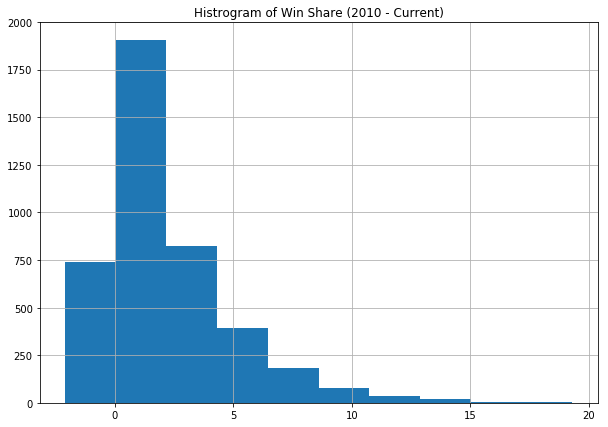

In [27]:
baseStats[(baseStats['Year'] > 2010)]['WS'].hist(figsize=(10,7))
plt.title("Histrogram of Win Share (2010 - Current)")

In [28]:
baseStats[(baseStats['Year'] > 2010)].head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20501,20501,2011.0,Jeff Adrien,PF,24.0,GSW,23.0,0.0,196.0,11.3,...,0.579,23.0,35.0,58.0,10.0,4.0,5.0,9.0,28.0,57.0
20502,20502,2011.0,Arron Afflalo,SG,25.0,DEN,69.0,69.0,2324.0,13.6,...,0.847,45.0,206.0,251.0,168.0,34.0,31.0,71.0,153.0,867.0
20503,20503,2011.0,Maurice Ager,SG,26.0,MIN,4.0,0.0,29.0,10.1,...,NaN,0.0,2.0,2.0,1.0,1.0,0.0,4.0,4.0,15.0
20504,20504,2011.0,Alexis Ajinca,C,22.0,TOT,34.0,2.0,340.0,12.2,...,0.722,17.0,61.0,78.0,10.0,11.0,19.0,18.0,73.0,143.0
20505,20505,2011.0,Alexis Ajinca,C,22.0,DAL,10.0,2.0,75.0,12.8,...,0.667,5.0,12.0,17.0,2.0,3.0,5.0,1.0,13.0,29.0


#### Histograms can be used to view the distribution of key numeric features

C:\Anaconda2\envs\py36\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda2\envs\py36\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


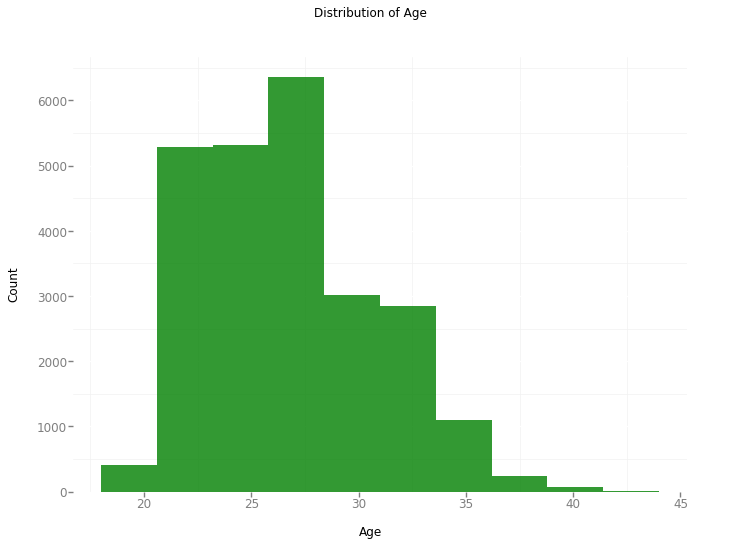

<ggplot: (77870517140)>

In [29]:
from ggplot import ggplot
from ggplot import *
ggplot(aes(x='Age'), data=baseStats) + \
        geom_histogram(alpha = 0.8,fill = 'green') +\
        ylab("Count") +\
        ggtitle('Distribution of Age') +\
        theme_bw()

#### Query Season and Team to Extract Full Team Stats

In [30]:
baseStats[(baseStats['Year']==2016) & (baseStats['Tm']=="NYK")]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23520,23520,2016.0,Arron Afflalo,SG,30.0,NYK,71.0,57.0,2371.0,10.9,...,0.840,23.0,243.0,266.0,144.0,25.0,10.0,82.0,142.0,909.0
23528,23528,2016.0,Lou Amundson,PF,33.0,NYK,29.0,0.0,204.0,6.7,...,0.519,23.0,26.0,49.0,12.0,6.0,7.0,15.0,44.0,52.0
23538,23538,2016.0,Thanasis Antetokounmpo,SF,23.0,NYK,2.0,0.0,6.0,32.9,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0
23539,23539,2016.0,Carmelo Anthony,SF,31.0,NYK,72.0,72.0,2530.0,20.3,...,0.829,98.0,458.0,556.0,299.0,62.0,38.0,176.0,180.0,1573.0
23597,23597,2016.0,Jose Calderon,PG,34.0,NYK,72.0,72.0,2024.0,12.3,...,0.875,22.0,207.0,229.0,298.0,63.0,7.0,87.0,135.0,544.0
23655,23655,2016.0,Cleanthony Early,SF,24.0,NYK,17.0,2.0,154.0,2.2,...,0.750,4.0,22.0,26.0,6.0,2.0,3.0,9.0,16.0,31.0
23681,23681,2016.0,Jimmer Fredette,SG,26.0,NYK,2.0,0.0,5.0,47.4,...,0.800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0
23686,23686,2016.0,Langston Galloway,PG,24.0,NYK,82.0,7.0,2033.0,11.7,...,0.754,43.0,245.0,288.0,207.0,77.0,22.0,61.0,177.0,625.0
23703,23703,2016.0,Jerian Grant,PG,23.0,NYK,76.0,6.0,1265.0,11.2,...,0.780,23.0,120.0,143.0,177.0,50.0,10.0,87.0,97.0,426.0
23847,23847,2016.0,Robin Lopez,C,27.0,NYK,82.0,82.0,2219.0,17.6,...,0.795,268.0,334.0,602.0,114.0,16.0,129.0,133.0,182.0,842.0


---
## Salary Data

In [31]:
salary = pd.read_csv('salaries.csv',sep=',')
salary.head()

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks


### *Descriptive Statistics*
* Average Salary by Season
* Histogram of $M per Win Share (requires joining to salaries to statistics)

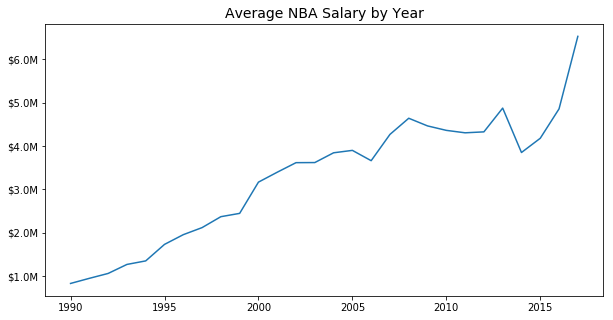

In [32]:
salaryGroup = salary.groupby(salary['season_start'],as_index=False).mean()

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(formatter)
plt.plot(salaryGroup['season_start'],salaryGroup['salary'])
plt.title("Average NBA Salary by Year",fontsize=14)
plt.show()
plt.figure(figsize=(10,10))


In [33]:
newStats = baseStats[(baseStats['Year']>=2005)]

In [34]:
newStats['Player'] = newStats['Player'].map(lambda x: x.lower())

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
newStats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17076,17076,2005.0,shareef abdur-rahim,PF,28.0,POR,54.0,49.0,1867.0,18.7,...,0.866,123.0,269.0,392.0,111.0,49.0,26.0,117.0,150.0,909.0
17077,17077,2005.0,cory alexander,SG,31.0,CHA,16.0,1.0,201.0,8.8,...,0.750,8.0,21.0,29.0,37.0,9.0,1.0,19.0,29.0,49.0
17078,17078,2005.0,malik allen,PF,26.0,TOT,36.0,1.0,519.0,14.2,...,0.929,40.0,59.0,99.0,18.0,9.0,22.0,18.0,53.0,194.0
17079,17079,2005.0,malik allen,PF,26.0,MIA,14.0,0.0,248.0,13.6,...,0.929,24.0,28.0,52.0,11.0,4.0,11.0,11.0,29.0,83.0
17080,17080,2005.0,malik allen,PF,26.0,CHA,22.0,1.0,271.0,14.8,...,0.929,16.0,31.0,47.0,7.0,5.0,11.0,7.0,24.0,111.0


In [36]:
newStats['Year'] = newStats['Year'].map(lambda x: int(x))
newStats2 = newStats.set_index(['Player','Year','Tm']).reset_index()

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
salary.head()
salary['player'] = salary['player'].map(lambda x: x.lower())
salary['season_start'] = salary['season_start'].map(lambda x: round(int(x),1))

newSal = salary.set_index(['player','season_start','team']).reset_index()

In [38]:
updatedNew = pd.merge(newStats2,newSal,left_on=['Player','Year','Tm'], right_on=['player','season_start','team'])

In [155]:
print(len(newStats2))
print(len(updatedNew))

7603
2737


<font color='red'>**There were major issues with the join resulting in many records not joining** </font>

In [188]:
newStats3 = newStats2.query('Tm != "TOT"')

**Improvements to Fix Join Logic**
* Total stats were removed from the stats file
* Mapping table manually created in order to provide consistency for team abbrevations is used
* There were several teams without transactions as actie GMs were not pulled for them or data was unavailable in the source data
    - Chicago Bulls
    - Charlotte Hornets
    - Los Angeles Lakers
    - Oklahoma City Thunder
    - Orlando Magic
    - Sacramento Kings

In [183]:
teamLu = pd.read_csv('teamName.csv',sep=',')
teamLu.columns = ['tm_stats','tm_salary','tm_transactions']
teamLu.head()

,tm_stats,tm_salary,tm_transactions
0,ATL,ATL,Hawks
1,BOS,BOS,Celtics
2,BRK,NJN,Nets
3,CHA,CHA,Bobcats
4,CHI,CHI,NaN


In [189]:
newStatsTeam = pd.merge(newStats3,teamLu,left_on=['Tm'], right_on=['tm_stats'])

In [190]:
newStatsTeam.head()

,Player,Year,Tm,Unnamed: 0,Pos,Age,G,GS,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,tm_stats,tm_salary,tm_transactions
0,shareef abdur-rahim,2005,POR,17076,PF,28.0,54.0,49.0,1867.0,18.7,...,392.0,111.0,49.0,26.0,117.0,150.0,909.0,POR,POR,Blazers
1,derek anderson,2005,POR,17085,SG,30.0,47.0,32.0,1239.0,11.7,...,128.0,143.0,36.0,4.0,70.0,89.0,432.0,POR,POR,Blazers
2,maurice baker,2005,POR,17106,PG,25.0,4.0,0.0,18.0,-0.2,...,2.0,1.0,1.0,0.0,1.0,3.0,0.0,POR,POR,Blazers
3,geno carlisle,2005,POR,17174,SG,28.0,6.0,0.0,16.0,18.1,...,1.0,1.0,0.0,0.0,1.0,1.0,8.0,POR,POR,Blazers
4,richie frahm,2005,POR,17257,SG,27.0,43.0,0.0,499.0,12.4,...,61.0,30.0,15.0,4.0,14.0,35.0,164.0,POR,POR,Blazers


In [269]:
updatedNew = pd.merge(newStatsTeam,newSal,left_on=['Player','Year','tm_salary'], right_on=['player','season_end','team'],how='inner')
print(len(newStatsTeam))
print(len(updatedNew))

6852
5179


**Data Errors**
* There is no data for the charlotte bobcats.  Only data available for hornets
* When players get traded, there seems to be a mismatch (consider matching without team name)

---

In [270]:
updatedNew['$M per WS'] = (updatedNew['salary']/updatedNew['WS'])/1000000

Text(0.5,1,'Histrogram of $M per Win Share')

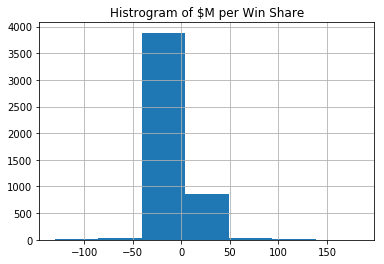

In [271]:
updatedNew2 = updatedNew[np.isfinite(updatedNew['$M per WS'])]
updatedNew2['$M per WS'].hist(bins=7)
plt.title("Histrogram of $M per Win Share")

In [272]:
updatedNew2[['WS','salary','$M per WS']].head()

,WS,salary,$M per WS
0,5.4,14625000,2.708333
1,1.3,8443500,6.495000
2,0.1,65779,0.657790
3,1.0,695046,0.695046
4,0.3,1019400,3.398000


In [273]:
updatedNew2['$M per WS'].describe()

count    4824.000000
mean        2.403506
std        11.522848
min      -130.586060
25%         0.567360
50%         1.317211
75%         2.857143
max       183.000000
Name: $M per WS, dtype: float64

---
### Normalize Salary by Yearly Average to Maintain Consistency
* Why this is important is represented by the graph several cells above which shows salary by year
* Summarize average salary per year and then merge back to dataset and replot data

In [274]:
updatedNew2.head()

,Player,Year,Tm,Unnamed: 0,Pos,Age,G,GS,MP,PER,...,tm_stats,tm_salary,tm_transactions,player,season_start,team,salary,season_end,team_name,$M per WS
0,shareef abdur-rahim,2005,POR,17076,PF,28.0,54.0,49.0,1867.0,18.7,...,POR,POR,Blazers,shareef abdur-rahim,2004,POR,14625000,2005,Portland Trail Blazers,2.708333
1,derek anderson,2005,POR,17085,SG,30.0,47.0,32.0,1239.0,11.7,...,POR,POR,Blazers,derek anderson,2004,POR,8443500,2005,Portland Trail Blazers,6.495000
2,geno carlisle,2005,POR,17174,SG,28.0,6.0,0.0,16.0,18.1,...,POR,POR,Blazers,geno carlisle,2004,POR,65779,2005,Portland Trail Blazers,0.657790
3,richie frahm,2005,POR,17257,SG,27.0,43.0,0.0,499.0,12.4,...,POR,POR,Blazers,richie frahm,2004,POR,695046,2005,Portland Trail Blazers,0.695046
4,viktor khryapa,2005,POR,17370,SF,22.0,32.0,5.0,523.0,9.0,...,POR,POR,Blazers,viktor khryapa,2004,POR,1019400,2005,Portland Trail Blazers,3.398000


In [275]:
yearlyAvg = updatedNew2.groupby('Year',as_index=True).mean()['salary'].reset_index()

In [276]:
yearlyAvg.head()

,Year,salary
0,2005,3.873282e+06
1,2006,3.959873e+06
2,2007,3.954980e+06
3,2008,4.381247e+06
4,2009,4.722756e+06


In [277]:
yearlyAvg = yearlyAvg.rename({'salary':'avgSalary'},axis = 'columns')
updatedNew = pd.merge(updatedNew2,yearlyAvg,left_on=['Year'], right_on=['Year'])

In [278]:
updatedNew.head()

,Player,Year,Tm,Unnamed: 0,Pos,Age,G,GS,MP,PER,...,tm_salary,tm_transactions,player,season_start,team,salary,season_end,team_name,$M per WS,avgSalary
0,shareef abdur-rahim,2005,POR,17076,PF,28.0,54.0,49.0,1867.0,18.7,...,POR,Blazers,shareef abdur-rahim,2004,POR,14625000,2005,Portland Trail Blazers,2.708333,3.873282e+06
1,derek anderson,2005,POR,17085,SG,30.0,47.0,32.0,1239.0,11.7,...,POR,Blazers,derek anderson,2004,POR,8443500,2005,Portland Trail Blazers,6.495000,3.873282e+06
2,geno carlisle,2005,POR,17174,SG,28.0,6.0,0.0,16.0,18.1,...,POR,Blazers,geno carlisle,2004,POR,65779,2005,Portland Trail Blazers,0.657790,3.873282e+06
3,richie frahm,2005,POR,17257,SG,27.0,43.0,0.0,499.0,12.4,...,POR,Blazers,richie frahm,2004,POR,695046,2005,Portland Trail Blazers,0.695046,3.873282e+06
4,viktor khryapa,2005,POR,17370,SF,22.0,32.0,5.0,523.0,9.0,...,POR,Blazers,viktor khryapa,2004,POR,1019400,2005,Portland Trail Blazers,3.398000,3.873282e+06


In [279]:
updatedNew['normalizedSalary'] = updatedNew['salary'] / updatedNew['avgSalary']

In [280]:
updatedNew['normalizedSalary'].describe()

count    4824.000000
mean        1.000000
std         1.031360
min         0.000849
25%         0.251801
50%         0.616942
75%         1.381841
max         6.342458
Name: normalizedSalary, dtype: float64

Text(0.5,1,'Histrogram of Normalized Salary')

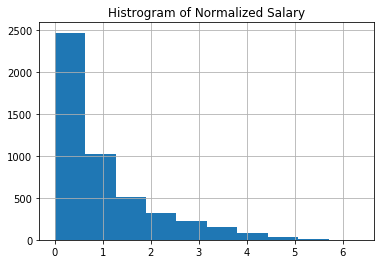

In [281]:
updatedNew['normalizedSalary'].hist()
plt.title("Histrogram of Normalized Salary")

1. Salary divided by average yearly salary
2. WS / $M

In [282]:
updatedNew['WS per $M'] = updatedNew['WS'] / updatedNew['normalizedSalary']

In [283]:
updatedNew['WS per $M'].describe()

count    4824.000000
mean        4.380798
std         6.692164
min       -37.906224
25%         1.030209
50%         2.653536
75%         5.394000
max       117.767160
Name: WS per $M, dtype: float64

Text(0.5,1,'Histrogram of Win Share per Million Dollars Salary')

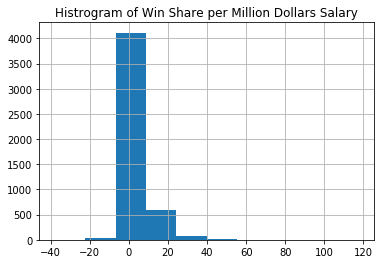

In [284]:
updatedNew['WS per $M'].hist()
plt.title("Histrogram of Win Share per Million Dollars Salary")

In [285]:
updatedNew.sort_values(['WS per $M'])[['Year','Player','WS','salary','WS per $M','normalizedSalary']].head()

,Year,Player,WS,salary,WS per $M,normalizedSalary
4568,2017,patricio garino,-0.2,31969,-37.906224,0.005276
4693,2017,gary payton,-0.2,35166,-34.460106,0.005804
3829,2015,larry drew,-0.4,59686,-28.901725,0.013840
4604,2017,elijah millsap,-0.1,23069,-26.265206,0.003807
760,2007,will conroy,-0.1,15099,-26.193653,0.003818


#### Filtering for minimum number of Games
* Group by year and summarize the average games 
* Decision to only include players who play 40 or more games

In [286]:
totalGamesPerPlayer = updatedNew.groupby(['Year','Player']).sum()['G'].reset_index()

count    4762.000000
mean       54.864973
std        23.330552
min         1.000000
25%        36.000000
50%        62.000000
75%        75.750000
max        83.000000
Name: G, dtype: float64

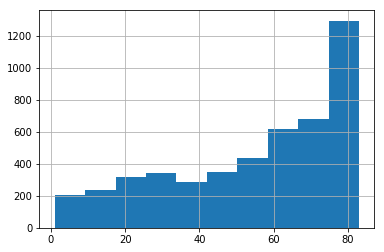

In [287]:
totalGamesPerPlayer['G'].hist()
totalGamesPerPlayer['G'].describe()

In [288]:
#updatedNew = updatedNew.filter('G >= 40')

--- 
### Join to Calculate WS of Different Components

#### A. Signed
* Identify all signed players
* Get start and end date of player tenure with team
* Calculate sum of normalized salary and sum of win shares

In [463]:
signedOnly = final.query('signed == True')

In [464]:
signedOnly.tail()

,acquired,date,notes,relinquished,team,GM,drafted,traded,signed,released,DraftPickNo,acquiredkeep_,transaction count
861,[ Justise Winslow],2017-09-19,team exercised contract option through 2018-19,[],Heat,Pat Riley,False,False,True,False,NaN,Justise Winslow,1
862,[ DeAndre Liggins],2017-10-10,signed free agent,[],Heat,Pat Riley,False,False,True,False,NaN,DeAndre Liggins,1
864,[ Tony Mitchell (b)],2017-10-12,signed free agent,[],Heat,Pat Riley,False,False,True,False,NaN,Tony Mitchell (b),1
869,[ Matt Williams],2017-10-15,converted contract to a two way contract,[],Heat,Pat Riley,False,False,True,False,NaN,Matt Williams,1
871,[ Derrick Jones Jr.],2017-12-31,signed free agent to a two way contract,[],Heat,Pat Riley,False,False,True,False,NaN,Derrick Jones Jr.,1


In [465]:
signedOnly['player'] = signedOnly['acquiredkeep_'].map(lambda x: x.lower())

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [466]:
signedOnly.tail(2)

,acquired,date,notes,relinquished,team,GM,drafted,traded,signed,released,DraftPickNo,acquiredkeep_,transaction count,player
869,[ Matt Williams],2017-10-15,converted contract to a two way contract,[],Heat,Pat Riley,False,False,True,False,NaN,Matt Williams,1,matt williams
871,[ Derrick Jones Jr.],2017-12-31,signed free agent to a two way contract,[],Heat,Pat Riley,False,False,True,False,NaN,Derrick Jones Jr.,1,derrick jones jr.


---

In [467]:
updatedNew.head()

,Player,Year,Tm,Unnamed: 0,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,tm_stats,tm_salary,tm_transactions,player,season_start,team,salary,season_end,team_name,$M per WS,avgSalary,normalizedSalary,WS per $M,id
1953,a.j. price,2010,IND,20357,PG,23.0,56.0,2.0,865.0,14.0,0.530,0.492,0.212,1.5,9.7,5.6,20.5,2.0,0.2,13.2,22.7,NaN,0.4,0.8,1.2,0.065,NaN,0.2,-2.0,-1.8,0.0,145.0,354.0,0.410,60.0,174.0,0.345,85.0,180.0,0.472,0.494,60.0,75.0,0.800,12.0,76.0,88.0,106.0,35.0,3.0,59.0,53.0,410.0,IND,IND,Pacers,a.j. price,2009,IND,457588,2010,Indiana Pacers,0.381323,4.681827e+06,0.097737,12.277841,1
2313,a.j. price,2011,IND,20966,PG,24.0,50.0,0.0,795.0,10.7,0.454,0.466,0.253,2.3,7.8,5.0,22.7,1.8,0.1,13.0,22.7,NaN,-0.4,0.7,0.3,0.020,NaN,-1.1,-2.3,-3.4,-0.3,114.0,320.0,0.356,41.0,149.0,0.275,73.0,171.0,0.427,0.420,54.0,81.0,0.667,16.0,56.0,72.0,111.0,29.0,1.0,53.0,61.0,323.0,IND,IND,Pacers,a.j. price,2010,IND,762195,2011,Indiana Pacers,2.540650,4.572444e+06,0.166693,1.799714,1
2699,a.j. price,2012,IND,21529,PG,25.0,44.0,1.0,568.0,11.5,0.454,0.506,0.201,2.6,9.4,6.0,23.9,1.9,0.3,14.5,17.7,NaN,0.2,0.5,0.7,0.063,NaN,-0.2,-1.7,-1.9,0.0,59.0,174.0,0.339,26.0,88.0,0.295,33.0,86.0,0.384,0.414,28.0,35.0,0.800,13.0,48.0,61.0,86.0,20.0,2.0,32.0,30.0,172.0,IND,IND,Pacers,a.j. price,2011,IND,854389,2012,Indiana Pacers,1.220556,4.360081e+06,0.195957,3.572210,1
3733,a.j. price,2015,PHO,23337,PG,28.0,5.0,0.0,44.0,-1.6,0.214,0.500,0.000,0.0,7.5,3.7,18.7,0.0,0.0,6.7,15.0,NaN,-0.1,0.0,-0.1,-0.140,NaN,-7.7,-4.1,-11.8,-0.1,3.0,14.0,0.214,0.0,7.0,0.000,3.0,7.0,0.429,0.214,0.0,0.0,NaN,0.0,3.0,3.0,6.0,0.0,0.0,1.0,5.0,6.0,PHO,PHO,Suns,a.j. price,2014,PHO,62552,2015,Phoenix Suns,-0.625520,4.312571e+06,0.014505,-6.894377,1
2934,a.j. price,2013,WAS,22100,PG,26.0,57.0,22.0,1278.0,12.4,0.501,0.484,0.150,1.7,8.2,4.9,26.4,1.3,0.2,12.7,18.0,NaN,1.0,1.2,2.2,0.084,NaN,-0.1,-1.7,-1.8,0.1,161.0,413.0,0.390,70.0,200.0,0.350,91.0,213.0,0.427,0.475,49.0,62.0,0.790,20.0,94.0,114.0,205.0,33.0,3.0,64.0,73.0,441.0,WAS,WAS,Wizards,a.j. price,2012,WAS,885120,2013,Washington Wizards,0.402327,4.390908e+06,0.201580,10.913771,1


#### Test min / max methodology on Lebron James Data where he returns back to the Cavs

* Filter for Lebron James
* Identify when the player and team are not the same on subsequent rows
    - Generates an ID which increments each time there is a change

Utilize a group by function to identify the start and end dates with each stint

In [468]:
updatedNewM = lbj.groupby(['Player','team','id'])['Year'].min().reset_index()
updatedNewM = updatedNewM.rename(index=str,columns={"Year":"start"})
updatedNewM

,Player,team,id,start
0,lebron james,CLE,1,2005
1,lebron james,MIA,1,2012


In [469]:
updatedNewE = lbj.groupby(['Player','team','id'])['Year'].max().reset_index()
updatedNewE = updatedNewE.rename(index=str,columns={"Year":"end"})
updatedNewE

,Player,team,id,end
0,lebron james,CLE,1,2017
1,lebron james,MIA,1,2014


#### Apply methodology to entire dataframe

In [470]:
updatedNew = updatedNew.sort_values(['Player','team'])
updatedNew['id'] = ((updatedNew.Tm != updatedNew.Tm.shift()) & (updatedNew.Player != updatedNew.Player.shift())).cumsum()
updatedNewM = updatedNew.groupby(['Player','team','id'])['Year'].min().reset_index()
updatedNewM = updatedNewM.rename(index=str,columns={"Year":"start"})
updatedNewE = updatedNew.groupby(['Player','team','id'])['Year'].max().reset_index()
updatedNewE = updatedNewE.rename(index=str,columns={"Year":"end"})

In [471]:
updatedNewV2t = pd.merge(updatedNew,updatedNewM,left_on=['team','Player','id'], right_on=['team','Player','id'])
updatedNewV2 = pd.merge(updatedNewV2t,updatedNewE,left_on=['team','Player','id'], right_on=['team','Player','id'])
updatedNewV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4824 entries, 0 to 4823
Data columns (total 69 columns):
Player              4824 non-null object
Year                4824 non-null int64
Tm                  4824 non-null object
Unnamed: 0          4824 non-null int64
Pos                 4824 non-null object
Age                 4824 non-null float64
G                   4824 non-null float64
GS                  4824 non-null float64
MP                  4824 non-null float64
PER                 4824 non-null float64
TS%                 4823 non-null float64
3PAr                4823 non-null float64
FTr                 4823 non-null float64
ORB%                4824 non-null float64
DRB%                4824 non-null float64
TRB%                4824 non-null float64
AST%                4824 non-null float64
STL%                4824 non-null float64
BLK%                4824 non-null float64
TOV%                4824 non-null float64
USG%                4824 non-null float64
blanl             

---
### Join to transactions by GM

In [472]:
signedOnly.groupby(['GM','team']).count()

acquired  date  notes  relinquished  \
GM                 team                                                 
Allan Bristow       Hornets           1199  1199   1199          1199   
Arturas Karnisovas  Nuggets            670   670    670           670   
Bob Myers           Warriors          4754  4754   4754          4754   
Bryan Colangelo     76ers             2011  2011   2011          2011   
                    Raptors           3617  3617   3617          3617   
                    Suns              7335  7335   7335          7335   
Chad Buchanan       Pacers             679   679    679           679   
Chris Wallace       Grizzlies         3461  3461   3461          3461   
Danny Ainge         Celtics           4216  4216   4216          4216   
Daryl Morey         Rockets           4270  4270   4270          4270   
Dave Babcock        Bucks             4274  4274   4274          4274   
Dave Checketts      Jazz               962   962    962           962   
Dave Wohl           Clippers          2412  2412   2412          2412   
Dell Demps          Bobcats             34    34     34            34   
                    Hornets           4006  4006   4006          4006   
Dennis Lindsey      Jazz              3291  3291   3291          3291   
Donnie Nelson       Mavericks         4604  4604   4604          4604   
Eddie Donovan       Braves             352   352    352           352   
                    Knicks            1287  1287   1287          1287   
Elgin Baylor        Clippers          4120  4120   4120          4120   
Ernie Grunfeld      Bucks             1480  1480   1480          1480   
                    Knicks            2421  2421   2421          2421   
                    Wizards           4951  4951   4951          4951   
Gar Forman          Bulls             3944  3944   3944          3944   
Jeff Bower          Pistons           3274  3274   3274          3274   
John Hammond        Bucks             3866  3866   3866          3866   
Jon Horst           Bucks             1477  1477   1477          1477   
Kevin Pritchard     Pacers            2849  2849   2849          2849   
Koby Altman         Cavaliers          484   484    484           484   
Lance Blanks        Suns              1549  1549   1549          1549   
Larry  Bird         Pacers            3355  3355   3355          3355   
Lon Babby           Suns              2558  2558   2558          2558   
Masai Ujiri         Raptors           2893  2893   2893          2893   
Michael Blackstone  Cavaliers         4029  4029   4029          4029   
Mike Budenholzer    Hawks             1603  1603   1603          1603   
Neil Olshey         Blazers           2592  2592   2592          2592   
                    Clippers          1607  1607   1607          1607   
Pat Riley           Heat              5156  5156   5156          5156   
Pete Babcock        Clippers            44    44     44            44   
                    Hawks             3757  3757   3757          3757   
                    Nuggets            813   813    813           813   
                    Raptors           1409  1409   1409          1409   
R.C. Buford         Spurs             5085  5085   5085          5085   
Rich Cho            Hornets           3789  3789   3789          3789   
Ryan McDonough      Suns              6426  6426   6426          6426   
Sam Presti          Sonics             782   782    782           782   
                    Thunder           3534  3534   3534          3534   
Scott Layden        Timberwolves      2093  2093   2093          2093   
Sean Marks          Nets              2026  2026   2026          2026   
Steve Mills         Knicks            6386  6386   6386          6386   
Tony DiLeo          76ers              746   746    746           746   
Travis Schlenk      Hawks             1202  1202   1202          1202   
Vince Boryla        Nuggets            683   683    683           683   

                  

In [473]:
signedOnly.head(10)

,acquired,date,notes,relinquished,team,GM,drafted,traded,signed,released,DraftPickNo,acquiredkeep_,transaction count,player
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Marco Belinelli,1,marco belinelli
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Miles Plumlee,1,miles plumlee
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,2017 second round pick (#41-Tyler Dorsey),1,2017 second round pick (#41-tyler dorsey)
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Jim O'Brien,1,jim o'brien
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Josh Harrellson,1,josh harrellson
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Derrick Rose,1,derrick rose
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Tim Connelly,1,tim connelly
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Spencer Dinwiddie,1,spencer dinwiddie
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Larry Riley,1,larry riley
0,[ Jim O'Brien],2003-05-21,re-signed as head coach to a 2-year contract ...,[],Celtics,Danny Ainge,False,False,True,False,NaN,Daryl Morey,1,daryl morey


Extract the year from the date column in order to join

In [474]:
signedOnly['year'] = signedOnly['date'].map(lambda x: x[:4])
signedOnly['team'] = signedOnly['team'].map(lambda x: x.strip())
signedOnly['player'] = signedOnly['player'].map(lambda x: x.strip())

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [475]:
updatedNewV2['Year'] = updatedNewV2['Year'].astype(str)

In [476]:
ttl = pd.merge(updatedNewV2,signedOnly,left_on=['Player','Year','tm_transactions'],right_on=['player','year','team'])

In [477]:
signedOnly.query('GM=="Pat Riley"')['year'].value_counts()

1995    715
1997    699
1996    674
1999    669
2000    350
2001    313
2003    214
2008    210
2005    197
2004    154
2007    147
1998    147
2006    126
2010    109
2009    101
2002     97
2013     58
2014     42
2011     42
2012     28
2017     22
2015     21
2016     21
Name: year, dtype: int64

In [478]:
len(ttl)

1618

In [479]:
ttl.head()

,Player,Year,Tm,Unnamed: 0,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,tm_stats,tm_salary,tm_transactions,player_x,season_start,team_x,salary,season_end,team_name,$M per WS,avgSalary,normalizedSalary,WS per $M,id,start,end,acquired,date,notes,relinquished,team_y,GM,drafted,traded,signed,released,DraftPickNo,acquiredkeep_,transaction count,player_y,year
0,a.j. price,2010,IND,20357,PG,23.0,56.0,2.0,865.0,14.0,0.530,0.492,0.212,1.5,9.7,5.6,20.5,2.0,0.2,13.2,22.7,NaN,0.4,0.8,1.2,0.065,NaN,0.2,-2.0,-1.8,0.0,145.0,354.0,0.410,60.0,174.0,0.345,85.0,180.0,0.472,0.494,60.0,75.0,0.800,12.0,76.0,88.0,106.0,35.0,3.0,59.0,53.0,410.0,IND,IND,Pacers,a.j. price,2009,IND,457588,2010,Indiana Pacers,0.381323,4.681827e+06,0.097737,12.277841,1,2010,2012,[ Tyler Hansbrough],2010-10-18,team exercised contract option through 2011-12,[],Pacers,Larry Bird,False,False,True,False,NaN,A.J. Price,1,a.j. price,2010
1,a.j. price,2015,PHO,23337,PG,28.0,5.0,0.0,44.0,-1.6,0.214,0.500,0.000,0.0,7.5,3.7,18.7,0.0,0.0,6.7,15.0,NaN,-0.1,0.0,-0.1,-0.140,NaN,-7.7,-4.1,-11.8,-0.1,3.0,14.0,0.214,0.0,7.0,0.000,3.0,7.0,0.429,0.214,0.0,0.0,NaN,0.0,3.0,3.0,6.0,0.0,0.0,1.0,5.0,6.0,PHO,PHO,Suns,a.j. price,2014,PHO,62552,2015,Phoenix Suns,-0.625520,4.312571e+06,0.014505,-6.894377,1,2015,2015,[ A.J. Price],2015-03-21,signed free agent to a 10-day contract,[],Suns,Ryan McDonough,False,False,True,False,NaN,A.J. Price,1,a.j. price,2015
2,a.j. price,2015,PHO,23337,PG,28.0,5.0,0.0,44.0,-1.6,0.214,0.500,0.000,0.0,7.5,3.7,18.7,0.0,0.0,6.7,15.0,NaN,-0.1,0.0,-0.1,-0.140,NaN,-7.7,-4.1,-11.8,-0.1,3.0,14.0,0.214,0.0,7.0,0.000,3.0,7.0,0.429,0.214,0.0,0.0,NaN,0.0,3.0,3.0,6.0,0.0,0.0,1.0,5.0,6.0,PHO,PHO,Suns,a.j. price,2014,PHO,62552,2015,Phoenix Suns,-0.625520,4.312571e+06,0.014505,-6.894377,1,2015,2015,[ Brandon Knight],2015-06-26,"team tendered qualifying offer, makign player...",[],Suns,Ryan McDonough,False,False,True,False,NaN,A.J. Price,1,a.j. price,2015
3,a.j. price,2015,PHO,23337,PG,28.0,5.0,0.0,44.0,-1.6,0.214,0.500,0.000,0.0,7.5,3.7,18.7,0.0,0.0,6.7,15.0,NaN,-0.1,0.0,-0.1,-0.140,NaN,-7.7,-4.1,-11.8,-0.1,3.0,14.0,0.214,0.0,7.0,0.000,3.0,7.0,0.429,0.214,0.0,0.0,NaN,0.0,3.0,3.0,6.0,0.0,0.0,1.0,5.0,6.0,PHO,PHO,Suns,a.j. price,2014,PHO,62552,2015,Phoenix Suns,-0.625520,4.312571e+06,0.014505,-6.894377,1,2015,2015,[ A.J. Price],2015-03-21,signed free agent to a 10-day contract,[],Suns,Lon Babby,False,False,True,False,NaN,A.J. Price,1,a.j. price,2015
4,aaron brooks,2009,HOU,19415,PG,24.0,80.0,35.0,1998.0,12.9,0.521,0.395,0.220,2.0,7.0,4.6,20.2,1.2,0.3,12.7,22.9,NaN,1.4,2.2,3.6,0.086,NaN,0.2,-1.5,-1.3,0.4,316.0,783.0,0.404,113.0,309.0,0.366,203.0,474.0,0.428,0.476,149.0,172.0,0.866,33.0,124.0,157.0,238.0,46.0,8.0,125.0,152.0,894.0,HOU,HOU,Rockets,aaron brooks,2008,HOU,1045560,2009,Houston Rockets,0.290433,4.722756e+06,0.221388,16.261069,2,2009,2014,[ Trevor Ariza],2009-07-08,"signed unrestricted free agent to a 5-year, $...",[],Rockets,Daryl Morey,False,False,True,False,NaN,Aaron Brooks,1,aaron brooks,2009


In [480]:
pd.set_option('display.max_columns', 500)
# signedTtl = ttl.groupby(['GM','Tm']).sum()
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
signedTtl = ttl.groupby(['GM','Tm']).agg({'WS':['sum','mean'], 'normalizedSalary':['sum','mean'], 'year':lambda x: x.nunique()})

In [481]:
signedTtl.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 42 entries, (Allan Bristow, NOH) to (Travis Schlenk, ATL)
Data columns (total 5 columns):
(WS, sum)                   42 non-null float64
(WS, mean)                  42 non-null float64
(normalizedSalary, sum)     42 non-null float64
(normalizedSalary, mean)    42 non-null float64
(year, <lambda>)            42 non-null int64
dtypes: float64(4), int64(1)
memory usage: 2.3+ KB


In [482]:
signedTtl['SignedComp'] = signedTtl['WS']['sum']/signedTtl['normalizedSalary']['sum']

In [483]:
signedTtl

WS           normalizedSalary               year  \
                          sum      mean              sum      mean <lambda>   
GM                 Tm                                                         
Allan Bristow      NOH   17.8  2.542857         3.879486  0.554212        1   
Arturas Karnisovas DEN   19.3  2.144444         5.524145  0.613794        1   
Bob Myers          GSW  253.8  3.525000        69.489238  0.965128        6   
Bryan Colangelo    PHI   20.3  0.812000         9.003288  0.360132        2   
                   PHO   58.0  5.800000         9.876472  0.987647        1   
                   TOR  135.7  2.467273        37.961827  0.690215        8   
Chad Buchanan      IND   20.0  2.500000         3.214688  0.401836        1   
Chris Wallace      MEM   61.1  1.527500        22.993110  0.574828        4   
Danny Ainge        BOS  159.2  3.184000        42.023404  0.840468       10   
Daryl Morey        HOU  180.1  3.216071        29.298214  0.523182        9   
Dave Babcock       MIL  235.2  2.767059        49.954264  0.587697       13   
Dave Wohl          LAC  154.9  4.996774        44.561538  1.437469        4   
Dell Demps         NOH  108.0  2.918919        28.589922  0.772701        4   
                   NOP   12.1  1.100000         3.497896  0.317991        4   
Dennis Lindsey     UTA  115.7  2.225000        24.869669  0.478263        6   
Elgin Baylor       LAC   33.8  1.988235         6.786354  0.399197        3   
Ernie Grunfeld     WAS  125.4  1.628571        41.382648  0.537437       13   
Jeff Bower         DET   87.5  2.734375        22.816062  0.713002        4   
John Hammond       MIL  262.6  2.984091        67.701622  0.769337       10   
Jon Horst          MIL   24.8  1.907692        17.685412  1.360416        1   
Kevin Pritchard    IND  159.9  4.100000        35.116219  0.900416        6   
Koby Altman        CLE    2.8  1.400000         3.713410  1.856705        1   
Lance Blanks       PHO   23.7  2.633333         7.246637  0.805182        2   
Larry  Bird        IND   58.8  2.261538        12.073372  0.464360        7   
Lon Babby          PHO   81.8  2.638710        16.283088  0.525261        5   
Masai Ujiri        TOR  175.5  3.988636        51.622736  1.173244        5   
Michael Blackstone CLE  136.4  2.311864        45.531029  0.771712        8   
Mike Budenholzer   ATL   34.7  1.508696         9.145275  0.397621        3   
Neil Olshey        LAC   45.7  2.176190        15.131216  0.720534        3   
                   POR   80.0  3.076923        13.569598  0.521908        6   
Pat Riley          MIA  208.8  2.900000        44.590360  0.619311       10   
Pete Babcock       TOR   22.8  3.257143         2.793342  0.399049        1   
R.C. Buford        SAS  250.0  3.086420        55.204599  0.681538       11   
Rich Cho           NOH   79.0  1.612245        29.061505  0.593092        3   
                   NOP   37.0  1.541667        11.569405  0.482059        4   
Ryan McDonough     PHO  319.4  1.983851        93.707463  0.582034        5   
Sam Presti         SEA   14.3  2.383333         7.013551  1.168925        2   
Scott Layden       MIN   64.8  3.410526         9.399292  0.494700        2   
Sean Marks         BRK   25.9  0.863333         6.723717  0.224124        2   
Steve Mills        NYK  143.6  1.450505        64.494913  0.651464        5   
Tony DiLeo         PHI   12.1  1.512500         4.153053  0.519132        2   
Travis Schlenk     ATL    9.7  1.385714         3.215172  0.459310        1   

                       SignedComp  
                                   
GM                 Tm              
Allan Bristow      NOH   4.588236  
Arturas Karnisovas DEN   3.493753  
Bob Myers          GSW   3.652364  
Bryan Colangelo    PHI   2.254732  
                   PHO   5.872542  
                   TOR   3.574644  
Chad Buchanan      IND   6.221444  
Chris Wallace      MEM   2.657318  
Danny Ainge        BOS   3.788365  
Daryl Morey        HOU   6.147132  
Dav